# Import libraries

In [58]:
rm(list = ls())
library(arm)
library(pROC)
library(e1071)
library(caret)
library(ggplot2)
require(gridExtra)
library(grid)
library(rms)
library(stargazer)
library(lme4)
library(stringr)
require(dplyr)
library(dplyr)
library(lme4)
require(tab)
library(sjPlot)

# Load the data

In [2]:
epl <- read.csv("../00_Data/final_dataset.csv",header=T, na.strings = c("NA","."))

# Data Pre-Processing

In [3]:
epl <- subset(epl, select=-c(defenceDefenderLineClass))

epl$date <- factor(epl$date)
epl$buildUpPlaySpeedClass <- factor(epl$buildUpPlaySpeedClass)
epl$buildUpPlayDribblingClass <- factor(epl$buildUpPlayDribblingClass)
epl$buildUpPlayPassingClass <- factor(epl$buildUpPlayPassingClass)
epl$buildUpPlayPositioningClass <- factor(epl$buildUpPlayPositioningClass)
epl$chanceCreationPassingClass <- factor(epl$chanceCreationPassingClass)
epl$chanceCreationCrossingClass <- factor(epl$chanceCreationCrossingClass)
epl$chanceCreationShootingClass <- factor(epl$chanceCreationShootingClass)
epl$chanceCreationPositioningClass <- factor(epl$chanceCreationPositioningClass)
epl$defencePressureClass <- factor(epl$defencePressureClass)
epl$defenceAggressionClass <- factor(epl$defenceAggressionClass)
epl$defenceTeamWidthClass <- factor(epl$defenceTeamWidthClass)
epl$team <- factor(epl$team)
epl$season <- factor(epl$season)
epl$log_overall_win_perc <- log(epl$overall_win_perc)

In [4]:
str(epl)

'data.frame':	88 obs. of  32 variables:
 $ X                             : int  0 1 2 3 4 5 6 7 8 9 ...
 $ id                            : int  71 72 73 74 75 76 77 78 79 80 ...
 $ date                          : Factor w/ 6 levels "2010-02-22 00:00:00",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ buildUpPlaySpeed              : int  66 75 25 30 59 59 70 65 67 63 ...
 $ buildUpPlaySpeedClass         : Factor w/ 3 levels "Balanced","Fast",..: 1 2 3 3 1 1 2 1 2 1 ...
 $ buildUpPlayDribblingClass     : Factor w/ 2 levels "Little","Normal": 1 1 1 1 2 2 1 1 1 1 ...
 $ buildUpPlayPassing            : int  30 40 32 29 26 30 59 50 58 59 ...
 $ buildUpPlayPassingClass       : Factor w/ 3 levels "Long","Mixed",..: 3 2 3 3 3 3 2 2 2 2 ...
 $ buildUpPlayPositioningClass   : Factor w/ 2 levels "Free Form","Organised": 1 1 2 2 2 2 2 2 2 2 ...
 $ chanceCreationPassing         : int  30 40 41 41 28 28 65 45 44 52 ...
 $ chanceCreationPassingClass    : Factor w/ 3 levels "Normal","Risky",..: 3 1 1 1 3 3 1 1 1 1 ...


# EDA = Main Effects

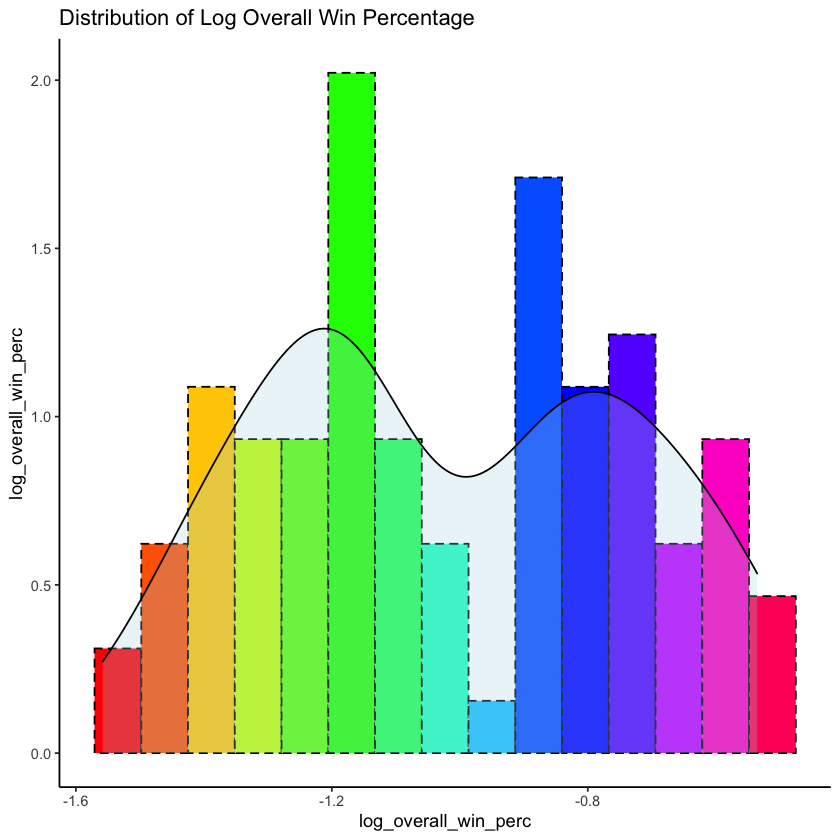

In [5]:
ggplot(epl,aes(log_overall_win_perc)) +
  geom_histogram(aes(y=..density..),color="black",linetype="dashed",
                 fill=rainbow(15),bins=15) + theme(legend.position="none") +
  geom_density(alpha=.25, fill="lightblue") + scale_fill_brewer(palette="Blues") +
  labs(title="Distribution of Log Overall Win Percentage",y="log_overall_win_perc") + theme_classic()

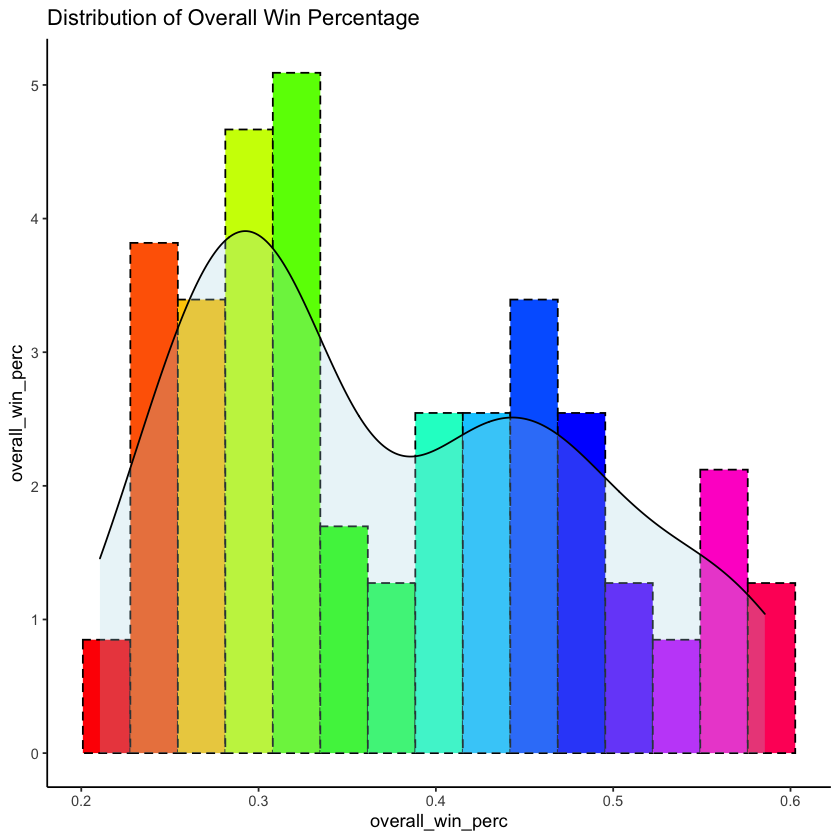

In [6]:
ggplot(epl,aes(overall_win_perc)) +
  geom_histogram(aes(y=..density..),color="black",linetype="dashed",
                 fill=rainbow(15),bins=15) + theme(legend.position="none") +
  geom_density(alpha=.25, fill="lightblue") + scale_fill_brewer(palette="Blues") +
  labs(title="Distribution of Overall Win Percentage",y="overall_win_perc") + theme_classic()

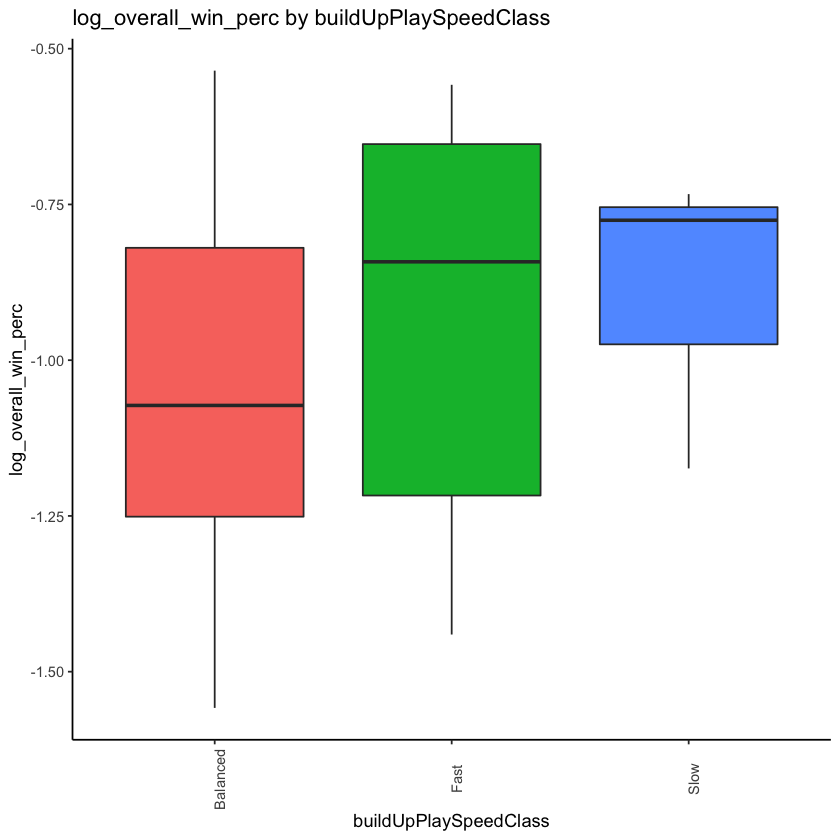

In [7]:
ggplot(epl,
       aes(x=buildUpPlaySpeedClass, y=log_overall_win_perc, fill=buildUpPlaySpeedClass)) +
  geom_boxplot() +
  labs(title="log_overall_win_perc by buildUpPlaySpeedClass",
       x="buildUpPlaySpeedClass",y="log_overall_win_perc") + theme_classic() +
  theme(legend.position="none",axis.text.x = element_text(angle = 90))

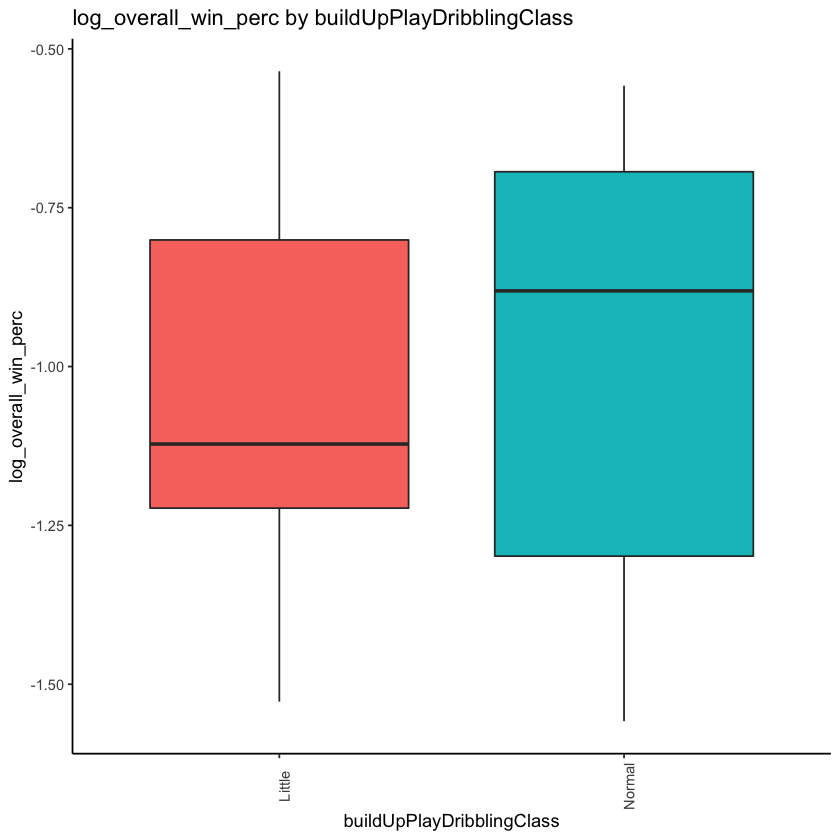

In [8]:
ggplot(epl,
       aes(x=buildUpPlayDribblingClass, y=log_overall_win_perc, fill=buildUpPlayDribblingClass)) +
  geom_boxplot() +
  labs(title="log_overall_win_perc by buildUpPlayDribblingClass",
       x="buildUpPlayDribblingClass",y="log_overall_win_perc") + theme_classic() +
  theme(legend.position="none",axis.text.x = element_text(angle = 90))

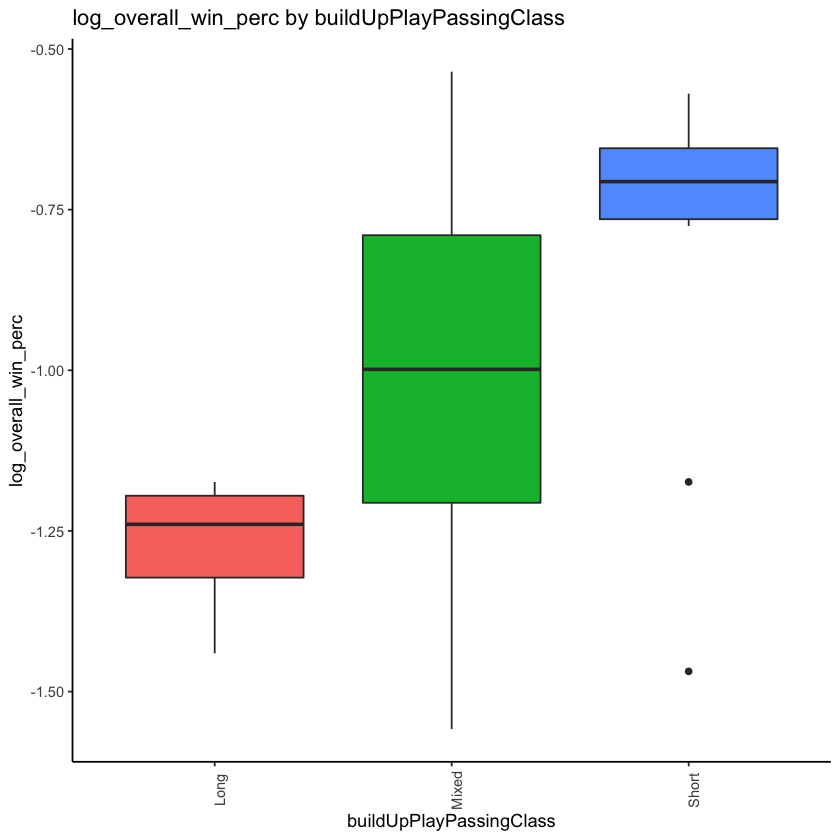

In [9]:
ggplot(epl,
       aes(x=buildUpPlayPassingClass, y=log_overall_win_perc, fill=buildUpPlayPassingClass)) +
  geom_boxplot() +
  labs(title="log_overall_win_perc by buildUpPlayPassingClass",
       x="buildUpPlayPassingClass",y="log_overall_win_perc") + theme_classic() +
  theme(legend.position="none",axis.text.x = element_text(angle = 90))

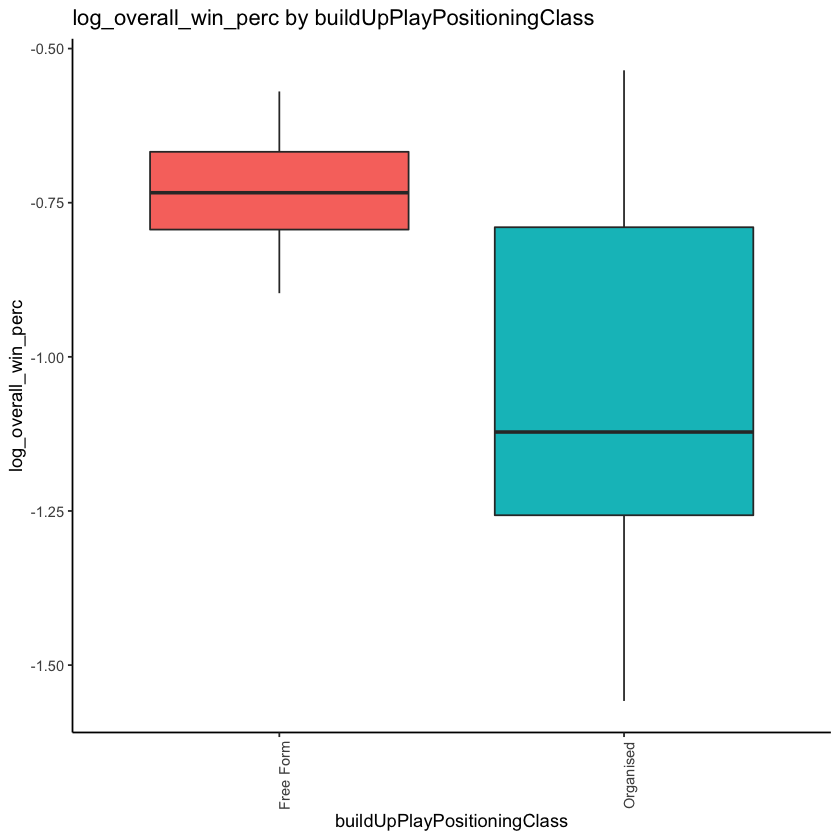

In [10]:
ggplot(epl,
       aes(x=buildUpPlayPositioningClass, y=log_overall_win_perc, fill=buildUpPlayPositioningClass)) +
  geom_boxplot() +
  labs(title="log_overall_win_perc by buildUpPlayPositioningClass",
       x="buildUpPlayPositioningClass",y="log_overall_win_perc") + theme_classic() +
  theme(legend.position="none",axis.text.x = element_text(angle = 90))

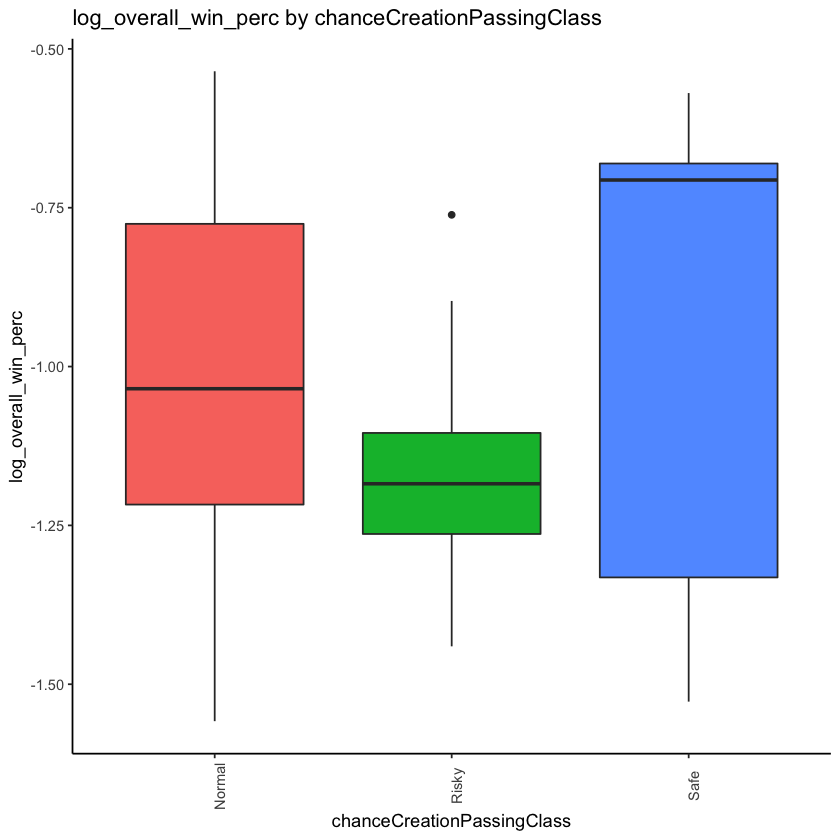

In [11]:
ggplot(epl,
       aes(x=chanceCreationPassingClass, y=log_overall_win_perc, fill=chanceCreationPassingClass)) +
  geom_boxplot() +
  labs(title="log_overall_win_perc by chanceCreationPassingClass",
       x="chanceCreationPassingClass",y="log_overall_win_perc") + theme_classic() +
  theme(legend.position="none",axis.text.x = element_text(angle = 90))

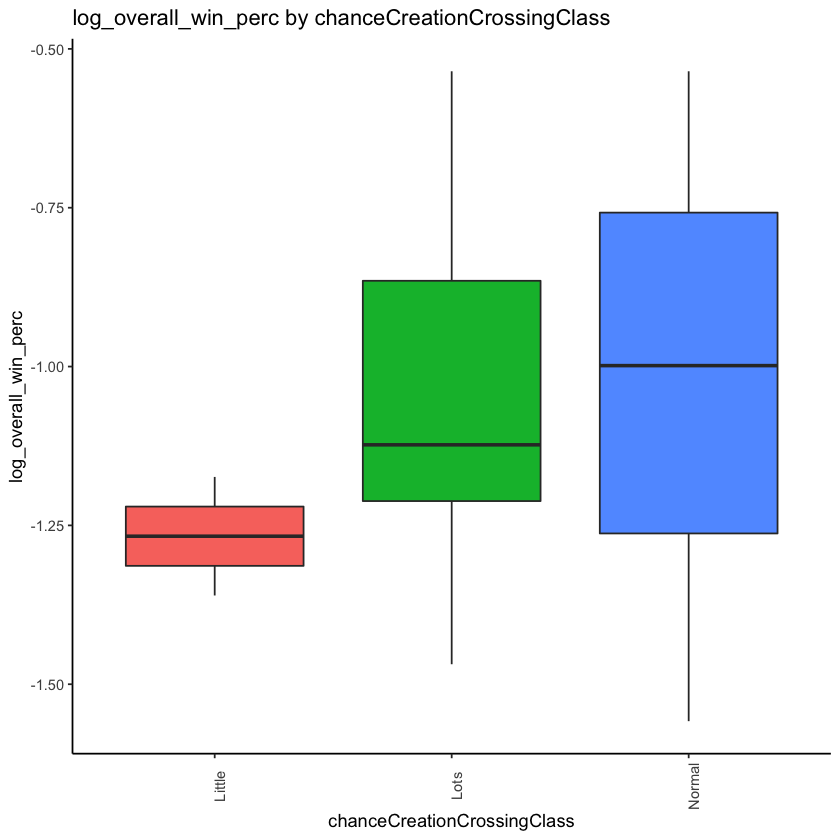

In [12]:
ggplot(epl,
       aes(x=chanceCreationCrossingClass, y=log_overall_win_perc, fill=chanceCreationCrossingClass)) +
  geom_boxplot() +
  labs(title="log_overall_win_perc by chanceCreationCrossingClass",
       x="chanceCreationCrossingClass",y="log_overall_win_perc") + theme_classic() +
  theme(legend.position="none",axis.text.x = element_text(angle = 90))

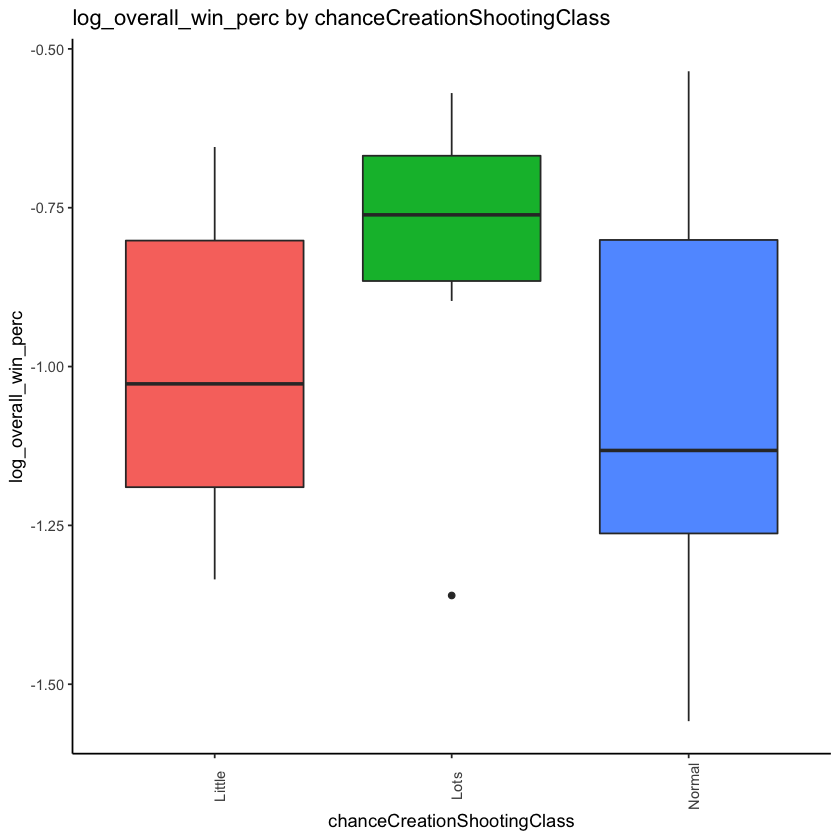

In [13]:
ggplot(epl,
       aes(x=chanceCreationShootingClass, y=log_overall_win_perc, fill=chanceCreationShootingClass)) +
  geom_boxplot() +
  labs(title="log_overall_win_perc by chanceCreationShootingClass",
       x="chanceCreationShootingClass",y="log_overall_win_perc") + theme_classic() +
  theme(legend.position="none",axis.text.x = element_text(angle = 90))

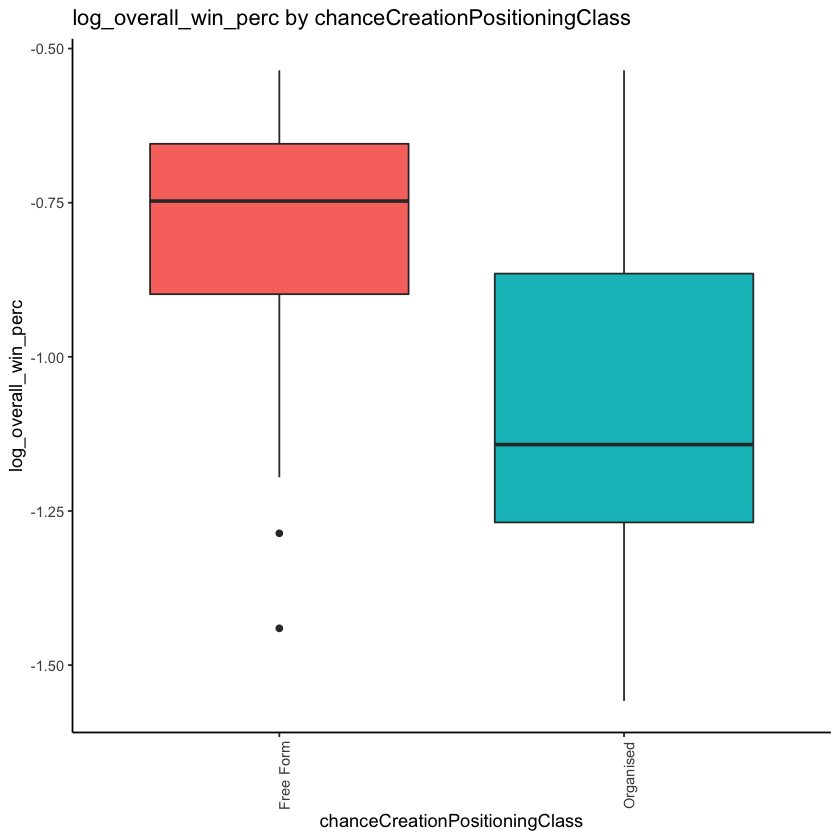

In [14]:
ggplot(epl,
       aes(x=chanceCreationPositioningClass, y=log_overall_win_perc, fill=chanceCreationPositioningClass)) +
  geom_boxplot() +
  labs(title="log_overall_win_perc by chanceCreationPositioningClass",
       x="chanceCreationPositioningClass",y="log_overall_win_perc") + theme_classic() +
  theme(legend.position="none",axis.text.x = element_text(angle = 90))

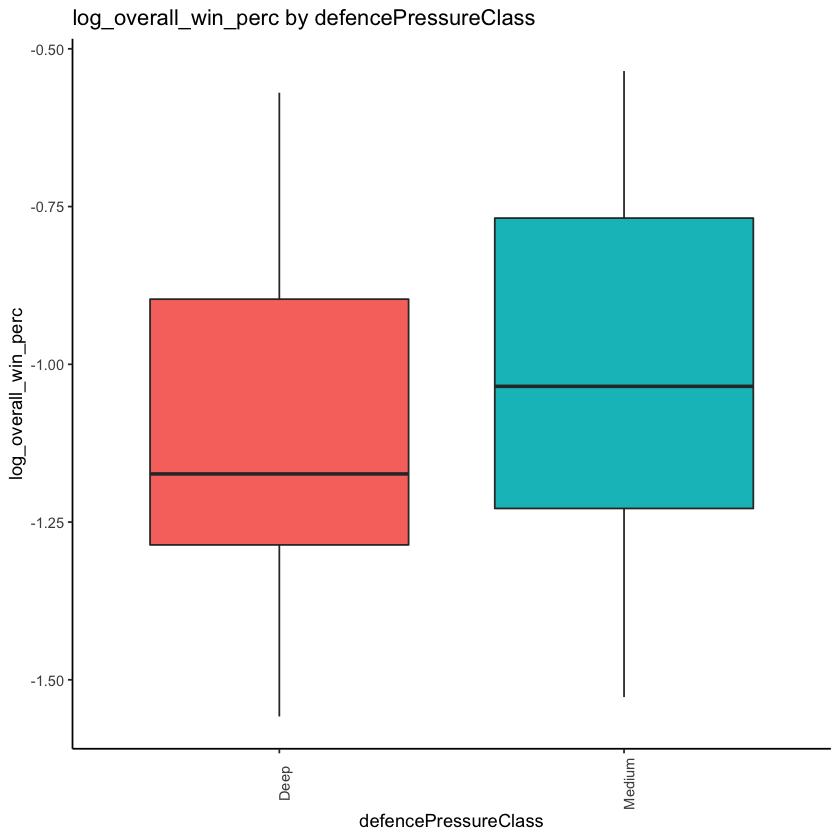

In [15]:
ggplot(epl,
       aes(x=defencePressureClass, y=log_overall_win_perc, fill=defencePressureClass)) +
  geom_boxplot() +
  labs(title="log_overall_win_perc by defencePressureClass",
       x="defencePressureClass",y="log_overall_win_perc") + theme_classic() +
  theme(legend.position="none",axis.text.x = element_text(angle = 90))

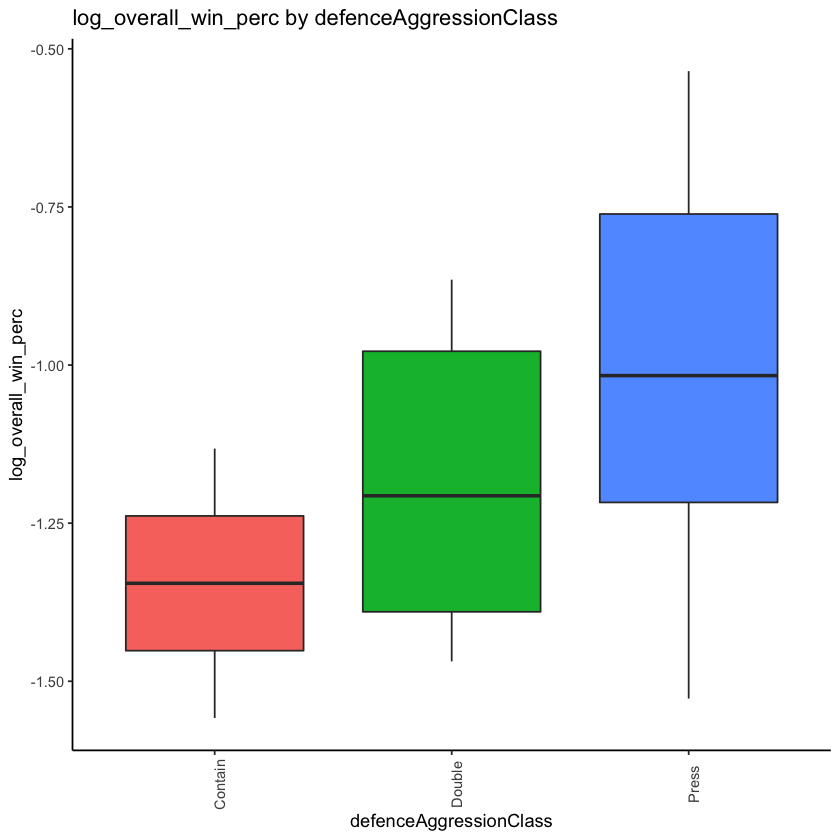

In [16]:
ggplot(epl,
       aes(x=defenceAggressionClass, y=log_overall_win_perc, fill=defenceAggressionClass)) +
  geom_boxplot() +
  labs(title="log_overall_win_perc by defenceAggressionClass",
       x="defenceAggressionClass",y="log_overall_win_perc") + theme_classic() +
  theme(legend.position="none",axis.text.x = element_text(angle = 90))

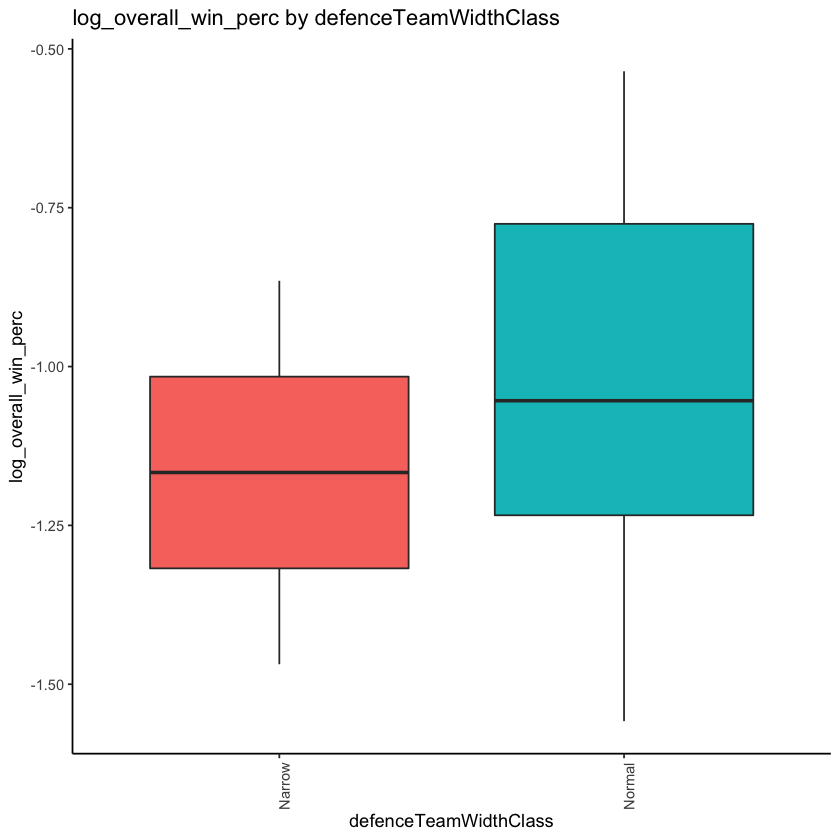

In [17]:
ggplot(epl,
       aes(x=defenceTeamWidthClass, y=log_overall_win_perc, fill=defenceTeamWidthClass)) +
  geom_boxplot() +
  labs(title="log_overall_win_perc by defenceTeamWidthClass",
       x="defenceTeamWidthClass",y="log_overall_win_perc") + theme_classic() +
  theme(legend.position="none",axis.text.x = element_text(angle = 90))

# EDA - Interactions

`geom_smooth()` using formula 'y ~ x'

Warning message in qt((1 - level)/2, df):
“NaNs produced”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


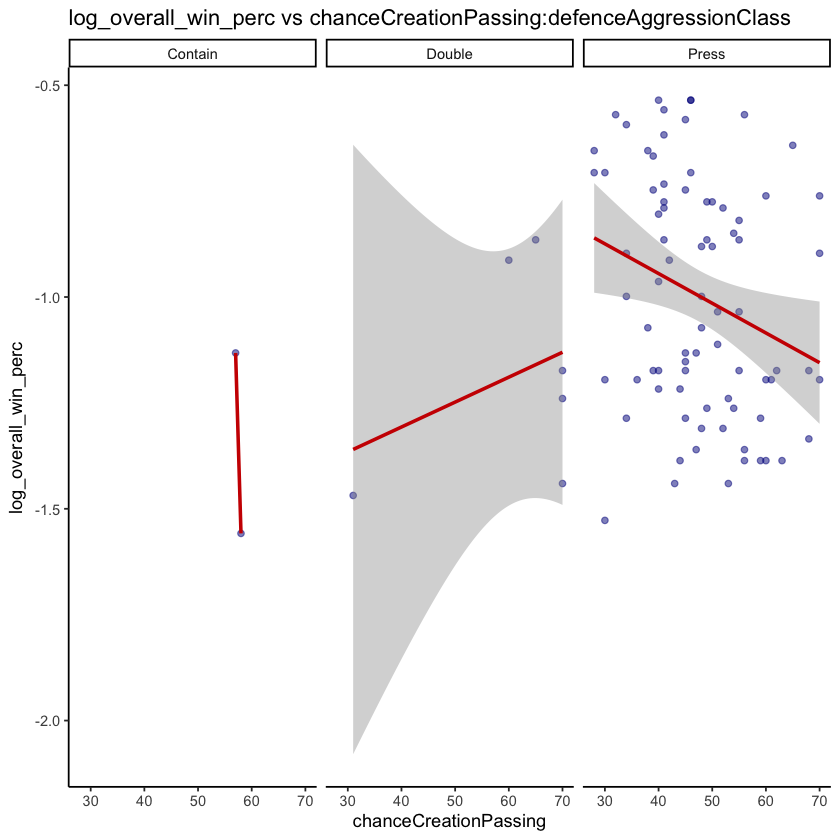

In [18]:
ggplot(epl,aes(x=chanceCreationPassing, y=log_overall_win_perc)) +
  geom_point(alpha = .5,colour="blue4") +
  geom_smooth(method="lm",col="red3") + theme_classic() +
  labs(title="log_overall_win_perc vs chanceCreationPassing:defenceAggressionClass",x="chanceCreationPassing",y="log_overall_win_perc") +
  facet_wrap( ~ defenceAggressionClass,ncol=4)

`geom_smooth()` using formula 'y ~ x'



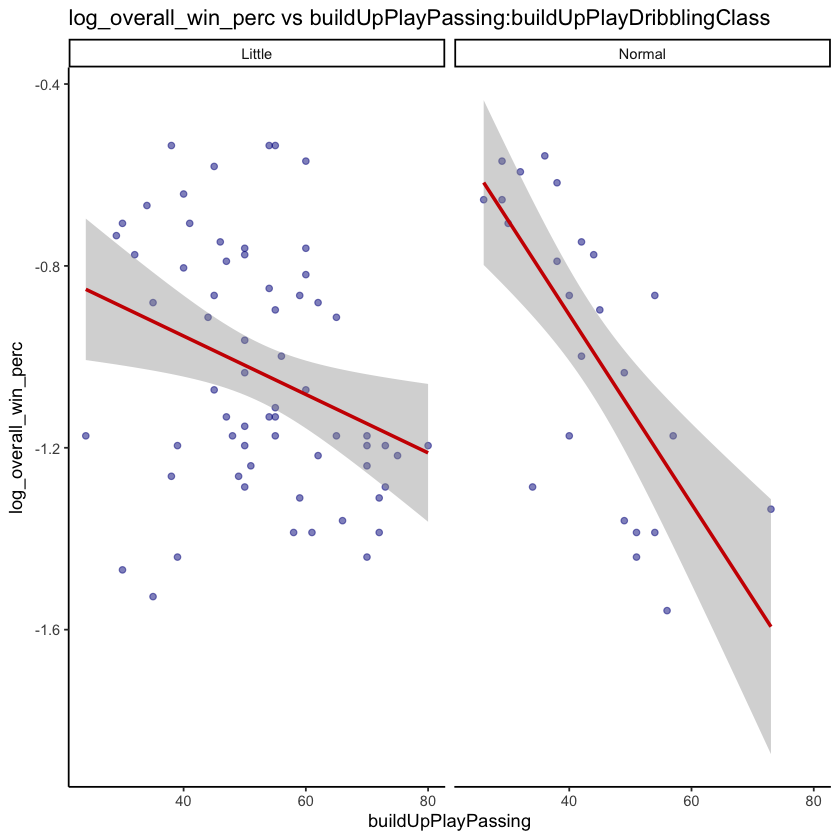

In [19]:
ggplot(epl,aes(x=buildUpPlayPassing, y=log_overall_win_perc)) +
  geom_point(alpha = .5,colour="blue4") +
  geom_smooth(method="lm",col="red3") + theme_classic() +
  labs(title="log_overall_win_perc vs buildUpPlayPassing:buildUpPlayDribblingClass",x="buildUpPlayPassing",y="log_overall_win_perc") +
  facet_wrap( ~ buildUpPlayDribblingClass,ncol=4)

`geom_smooth()` using formula 'y ~ x'



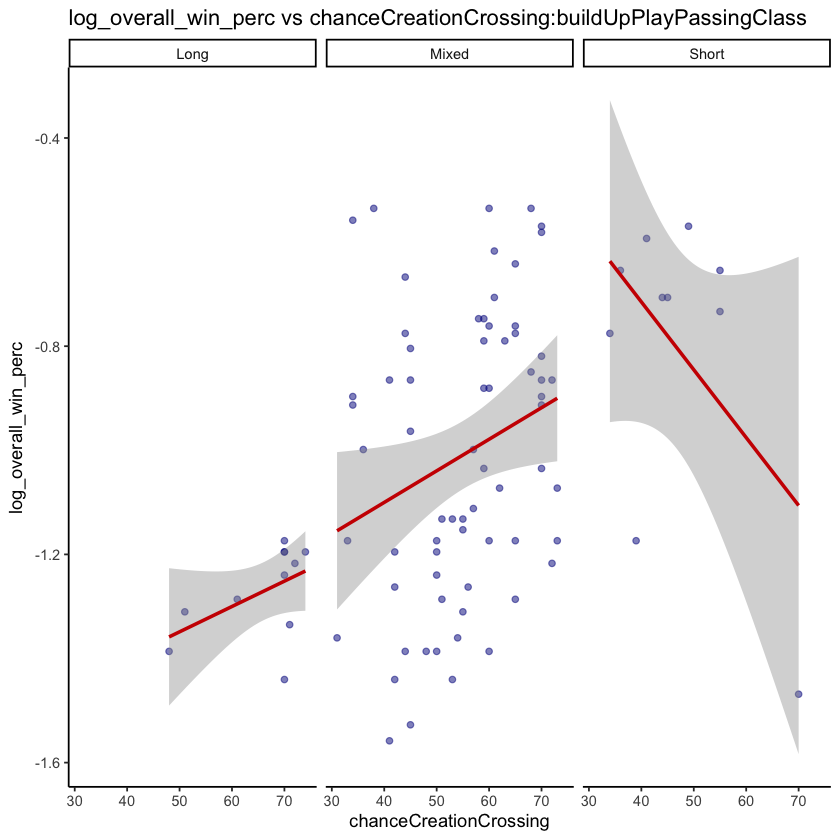

In [20]:
ggplot(epl,aes(x=chanceCreationCrossing, y=log_overall_win_perc)) +
  geom_point(alpha = .5,colour="blue4") +
  geom_smooth(method="lm",col="red3") + theme_classic() +
  labs(title="log_overall_win_perc vs chanceCreationCrossing:buildUpPlayPassingClass",x="chanceCreationCrossing",y="log_overall_win_perc") +
  facet_wrap( ~ buildUpPlayPassingClass,ncol=4)

`geom_smooth()` using formula 'y ~ x'



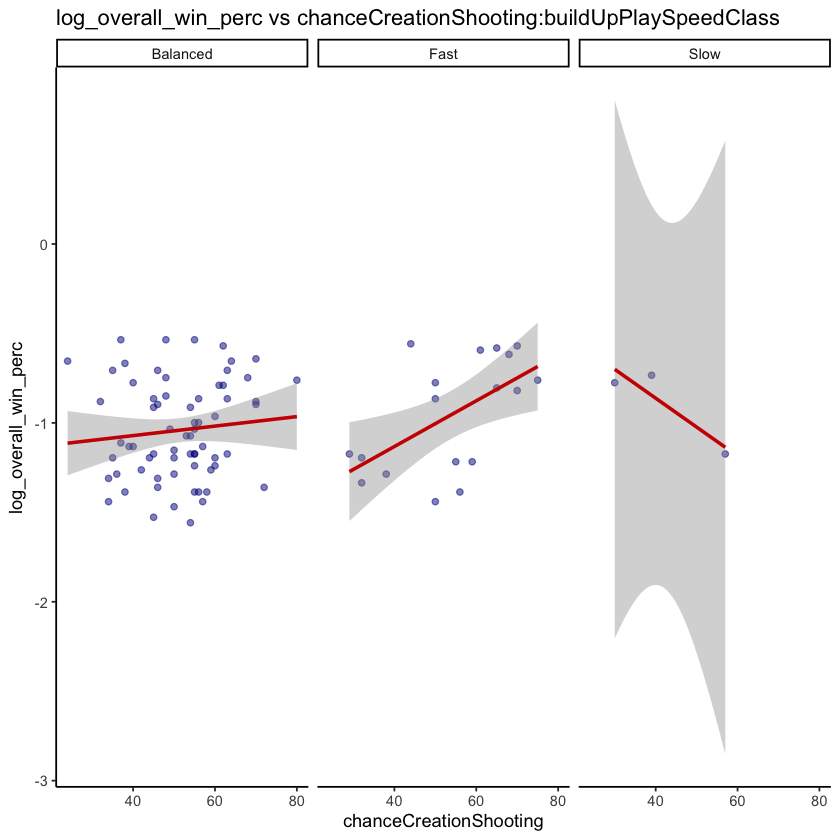

In [21]:
ggplot(epl,aes(x=chanceCreationShooting, y=log_overall_win_perc)) +
  geom_point(alpha = .5,colour="blue4") +
  geom_smooth(method="lm",col="red3") + theme_classic() +
  labs(title="log_overall_win_perc vs chanceCreationShooting:buildUpPlaySpeedClass",x="chanceCreationShooting",y="log_overall_win_perc") +
  facet_wrap( ~ buildUpPlaySpeedClass,ncol=4)

`geom_smooth()` using formula 'y ~ x'



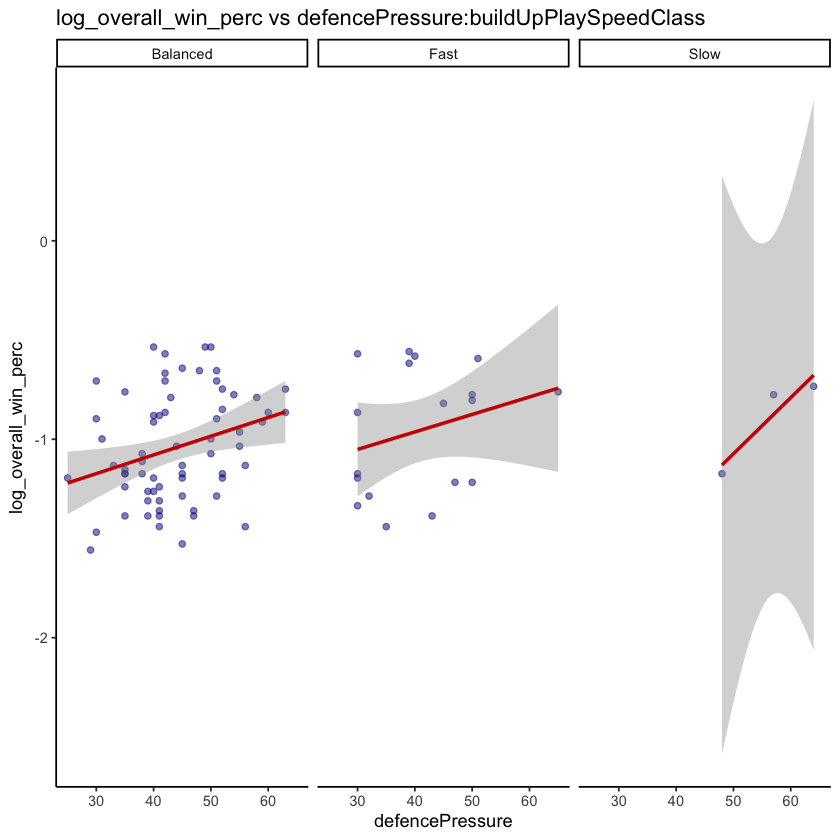

In [22]:
ggplot(epl,aes(x=defencePressure, y=log_overall_win_perc)) +
  geom_point(alpha = .5,colour="blue4") +
  geom_smooth(method="lm",col="red3") + theme_classic() +
  labs(title="log_overall_win_perc vs defencePressure:buildUpPlaySpeedClass",x="defencePressure",y="log_overall_win_perc") +
  facet_wrap( ~ buildUpPlaySpeedClass,ncol=4)

# Model Building

In [23]:
str(epl)

'data.frame':	88 obs. of  32 variables:
 $ X                             : int  0 1 2 3 4 5 6 7 8 9 ...
 $ id                            : int  71 72 73 74 75 76 77 78 79 80 ...
 $ date                          : Factor w/ 6 levels "2010-02-22 00:00:00",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ buildUpPlaySpeed              : int  66 75 25 30 59 59 70 65 67 63 ...
 $ buildUpPlaySpeedClass         : Factor w/ 3 levels "Balanced","Fast",..: 1 2 3 3 1 1 2 1 2 1 ...
 $ buildUpPlayDribblingClass     : Factor w/ 2 levels "Little","Normal": 1 1 1 1 2 2 1 1 1 1 ...
 $ buildUpPlayPassing            : int  30 40 32 29 26 30 59 50 58 59 ...
 $ buildUpPlayPassingClass       : Factor w/ 3 levels "Long","Mixed",..: 3 2 3 3 3 3 2 2 2 2 ...
 $ buildUpPlayPositioningClass   : Factor w/ 2 levels "Free Form","Organised": 1 1 2 2 2 2 2 2 2 2 ...
 $ chanceCreationPassing         : int  30 40 41 41 28 28 65 45 44 52 ...
 $ chanceCreationPassingClass    : Factor w/ 3 levels "Normal","Risky",..: 3 1 1 1 3 3 1 1 1 1 ...


In [24]:
Null_Model <- lmer(log_overall_win_perc ~ buildUpPlaySpeedClass + buildUpPlayDribblingClass 
               + chanceCreationCrossingClass + chanceCreationShootingClass + defenceAggressionClass
               + (1 | team), data = epl)

summary(Null_Model)

Linear mixed model fit by REML ['lmerMod']
Formula: 
log_overall_win_perc ~ buildUpPlaySpeedClass + buildUpPlayDribblingClass +  
    chanceCreationCrossingClass + chanceCreationShootingClass +  
    defenceAggressionClass + (1 | team)
   Data: epl

REML criterion at convergence: -27

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.75171 -0.60318 -0.01285  0.53580  2.32848 

Random effects:
 Groups   Name        Variance Std.Dev.
 team     (Intercept) 0.06638  0.2576  
 Residual             0.01833  0.1354  
Number of obs: 88, groups:  team, 16

Fixed effects:
                                   Estimate Std. Error t value
(Intercept)                       -1.241600   0.187482  -6.623
buildUpPlaySpeedClassFast          0.057829   0.042796   1.351
buildUpPlaySpeedClassSlow         -0.043842   0.098954  -0.443
buildUpPlayDribblingClassNormal   -0.009697   0.036531  -0.265
chanceCreationCrossingClassLots    0.141821   0.115901   1.224
chanceCreationCrossingClassNormal  

In [25]:
confint(Null_Model)

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.17724124,0.37498327
.sigma,0.10848874,0.15073568
(Intercept),-1.59066090,-0.88798993
buildUpPlaySpeedClassFast,-0.02175837,0.13741633
buildUpPlaySpeedClassSlow,-0.22863190,0.14051666
buildUpPlayDribblingClassNormal,-0.07797526,0.05847053
chanceCreationCrossingClassLots,-0.07437161,0.35770229
chanceCreationCrossingClassNormal,-0.06032182,0.35243785
chanceCreationShootingClassLots,-0.26797702,0.07587639
chanceCreationShootingClassNormal,-0.23123556,0.04840449


In [26]:
Full_Model <- lmer(log_overall_win_perc ~ buildUpPlaySpeedClass + buildUpPlayDribblingClass
               + buildUpPlayPassingClass + buildUpPlayPositioningClass #+ chanceCreationPassingClass
               + chanceCreationCrossingClass + chanceCreationShootingClass + chanceCreationPositioningClass 
               + defencePressureClass + defenceAggressionClass #+ defenceTeamWidthClass #+ season
               #+ chanceCreationPassing*defenceAggressionClass
               + (1 | team), data = epl)

summary(Full_Model)


Correlation matrix not shown by default, as p = 15 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']
Formula: 
log_overall_win_perc ~ buildUpPlaySpeedClass + buildUpPlayDribblingClass +  
    buildUpPlayPassingClass + buildUpPlayPositioningClass + chanceCreationCrossingClass +  
    chanceCreationShootingClass + chanceCreationPositioningClass +  
    defencePressureClass + defenceAggressionClass + (1 | team)
   Data: epl

REML criterion at convergence: -22.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.87002 -0.41608  0.01033  0.54562  2.10605 

Random effects:
 Groups   Name        Variance Std.Dev.
 team     (Intercept) 0.06108  0.2471  
 Residual             0.01621  0.1273  
Number of obs: 88, groups:  team, 16

Fixed effects:
                                        Estimate Std. Error t value
(Intercept)                             -1.37614    0.19411  -7.090
buildUpPlaySpeedClassFast                0.06134    0.04132   1.484
buildUpPlaySpeedClassSlow               -0.17011    0.11034  -1.542
buildUpPlayDribblingC

In [27]:
anova(Null_Model, Full_Model)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Null_Model,12,-40.32877,-10.600723,32.16438,-64.32877,NA,NA,NA
Full_Model,17,-46.46315,-4.348422,40.23157,-80.46315,16.13438,5,0.006470696


In [28]:
confint(Full_Model)

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.1687560192,0.361122388
.sigma,0.0978917264,0.136223069
(Intercept),-1.7229715120,-1.025097842
buildUpPlaySpeedClassFast,-0.0127170771,0.134964265
buildUpPlaySpeedClassSlow,-0.3675238934,0.026809266
buildUpPlayDribblingClassNormal,-0.1012691902,0.029405475
buildUpPlayPassingClassMixed,0.0171883768,0.216046951
buildUpPlayPassingClassShort,0.0985733646,0.408549522
buildUpPlayPositioningClassOrganised,-0.0015228324,0.268299875
chanceCreationCrossingClassLots,-0.0377607188,0.356390492


In [29]:
Model1 <- lmer(log_overall_win_perc ~ buildUpPlaySpeedClass + buildUpPlayDribblingClass 
               + buildUpPlayPassingClass + buildUpPlayPositioningClass #+ chanceCreationPassingClass
               + chanceCreationCrossingClass + chanceCreationShootingClass + chanceCreationPositioningClass 
               + defencePressureClass + defenceAggressionClass #+ defenceTeamWidthClass #+ season
               + chanceCreationPassing*defenceAggressionClass
               + (1 | team), data = epl)

summary(Model1)


Correlation matrix not shown by default, as p = 18 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']
Formula: 
log_overall_win_perc ~ buildUpPlaySpeedClass + buildUpPlayDribblingClass +  
    buildUpPlayPassingClass + buildUpPlayPositioningClass + chanceCreationCrossingClass +  
    chanceCreationShootingClass + chanceCreationPositioningClass +  
    defencePressureClass + defenceAggressionClass + chanceCreationPassing *  
    defenceAggressionClass + (1 | team)
   Data: epl

REML criterion at convergence: -18.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.76701 -0.45157  0.00481  0.42393  2.34243 

Random effects:
 Groups   Name        Variance Std.Dev.
 team     (Intercept) 0.0545   0.2334  
 Residual             0.0131   0.1145  
Number of obs: 88, groups:  team, 16

Fixed effects:
                                                    Estimate Std. Error t value
(Intercept)                                         27.55202   10.62443   2.593
buildUpPlaySpeedClassFast                            0.04978    0.03739   1.33

In [30]:
confint(Model1)

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.160476152,0.34010939
.sigma,0.085745746,0.11926153
(Intercept),9.067092034,46.05021409
buildUpPlaySpeedClassFast,-0.015481421,0.11464543
buildUpPlaySpeedClassSlow,-0.325887926,0.04681217
buildUpPlayDribblingClassNormal,-0.097736092,0.02200300
buildUpPlayPassingClassMixed,0.065417930,0.25218211
buildUpPlayPassingClassShort,0.181726840,0.50937279
buildUpPlayPositioningClassOrganised,0.017119799,0.25654565
chanceCreationCrossingClassLots,0.006950603,0.35706002


In [31]:
anova(Full_Model, Model1, test='Chisq')

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Full_Model,17,-46.46315,-4.348422,40.23157,-80.46315,NA,NA,NA
Model1,20,-61.47024,-11.923506,50.73512,-101.47024,21.00709,3,0.0001049196


Interactions worth observing: <br>
 chanceCreationPassing:defenceAggressionClass <br>
 buildUpPlayPassing:buildUpPlayDribblingClass <br>
 chanceCreationCrossing:buildUpPlayPassingClass <br>
 chanceCreationShooting:buildUpPlaySpeedClass

In [32]:
Model2 <- lmer(log_overall_win_perc ~ buildUpPlaySpeedClass + buildUpPlayDribblingClass 
               #+ buildUpPlayPassingClass 
               + buildUpPlayPositioningClass + chanceCreationPassingClass
               #+ chanceCreationCrossingClass 
               + chanceCreationShootingClass + chanceCreationPositioningClass 
               + defencePressureClass + defenceAggressionClass #+ defenceTeamWidthClass #+ season
               + chanceCreationCrossing*buildUpPlayPassingClass
               + (1 | team), data = epl)

summary(Model2)


Correlation matrix not shown by default, as p = 18 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']
Formula: 
log_overall_win_perc ~ buildUpPlaySpeedClass + buildUpPlayDribblingClass +  
    buildUpPlayPositioningClass + chanceCreationPassingClass +  
    chanceCreationShootingClass + chanceCreationPositioningClass +  
    defencePressureClass + defenceAggressionClass + chanceCreationCrossing *  
    buildUpPlayPassingClass + (1 | team)
   Data: epl

REML criterion at convergence: 0.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.64009 -0.51806 -0.01644  0.55817  1.91372 

Random effects:
 Groups   Name        Variance Std.Dev.
 team     (Intercept) 0.06145  0.2479  
 Residual             0.01586  0.1260  
Number of obs: 88, groups:  team, 16

Fixed effects:
                                                     Estimate Std. Error
(Intercept)                                         -1.811711   0.398385
buildUpPlaySpeedClassFast                            0.013346   0.046025
buildUpPlaySpeedClassSlow                     

In [33]:
confint(Model2)

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.169551202,0.3611058079
.sigma,0.094386096,0.1313144488
(Intercept),-2.507508677,-1.1173463695
buildUpPlaySpeedClassFast,-0.067514411,0.0931164884
buildUpPlaySpeedClassSlow,-0.539578239,-0.0685350618
buildUpPlayDribblingClassNormal,-0.111045259,0.0233970869
buildUpPlayPositioningClassOrganised,0.041637255,0.3210828224
chanceCreationPassingClassRisky,-0.131181059,0.1107264089
chanceCreationPassingClassSafe,-0.329023124,0.0293144286
chanceCreationShootingClassLots,-0.218292611,0.1645743698


In [34]:
anova(Model1, Model2)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Model1,20,-61.47024,-11.923506,50.73512,-101.47024,NA,NA,NA
Model2,20,-45.72415,3.822589,42.86207,-85.72415,0,0,NA


# Baseline Model

In [35]:
base_line_model <- Model1

Interactions worth observing: <br>
 chanceCreationPassing:defenceAggressionClass <br>
 buildUpPlayPassing:buildUpPlayDribblingClass <br>
 chanceCreationCrossing:buildUpPlayPassingClass <br>
 chanceCreationShooting:buildUpPlaySpeedClass

In [36]:
#tab_model(base_line_model)
confint(base_line_model)

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.160476152,0.34010939
.sigma,0.085745746,0.11926153
(Intercept),9.067092034,46.05021409
buildUpPlaySpeedClassFast,-0.015481421,0.11464543
buildUpPlaySpeedClassSlow,-0.325887926,0.04681217
buildUpPlayDribblingClassNormal,-0.097736092,0.02200300
buildUpPlayPassingClassMixed,0.065417930,0.25218211
buildUpPlayPassingClassShort,0.181726840,0.50937279
buildUpPlayPositioningClassOrganised,0.017119799,0.25654565
chanceCreationCrossingClassLots,0.006950603,0.35706002


In [37]:
summary(base_line_model)


Correlation matrix not shown by default, as p = 18 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']
Formula: 
log_overall_win_perc ~ buildUpPlaySpeedClass + buildUpPlayDribblingClass +  
    buildUpPlayPassingClass + buildUpPlayPositioningClass + chanceCreationCrossingClass +  
    chanceCreationShootingClass + chanceCreationPositioningClass +  
    defencePressureClass + defenceAggressionClass + chanceCreationPassing *  
    defenceAggressionClass + (1 | team)
   Data: epl

REML criterion at convergence: -18.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.76701 -0.45157  0.00481  0.42393  2.34243 

Random effects:
 Groups   Name        Variance Std.Dev.
 team     (Intercept) 0.0545   0.2334  
 Residual             0.0131   0.1145  
Number of obs: 88, groups:  team, 16

Fixed effects:
                                                    Estimate Std. Error t value
(Intercept)                                         27.55202   10.62443   2.593
buildUpPlaySpeedClassFast                            0.04978    0.03739   1.33

# Model Prediction Validation

In [38]:
pred <- predict(base_line_model)
epl$y_pred <- pred

In [39]:
tmp1 <- epl %>%
    select(season, log_overall_win_perc) %>%
    group_by(season) %>%
    summarise(max = max(log_overall_win_perc))

tmp2 <- inner_join(epl, tmp1, by=c("season" = "season", "log_overall_win_perc" = "max"))
tmp3 <- subset(tmp2, select=c(season, team, log_overall_win_perc, y_pred))
arrange(tmp3, season, log_overall_win_perc)

season,team,log_overall_win_perc,y_pred
<fct>,<fct>,<dbl>,<dbl>
2009/2010,Chelsea,-0.5695332,-0.5840818
2010/2011,Manchester United,-0.6418539,-0.6390876
2011/2012,Manchester City,-0.5352442,-0.7102140
2011/2012,Manchester United,-0.5352442,-0.6967373
2012/2013,Manchester United,-0.5352442,-0.6758864
2013/2014,Manchester City,-0.5695332,-0.6157727
2014/2015,Chelsea,-0.5579724,-0.6885252


# Actual Winners

2009/2010 - Chelsea <br>
2010/2011 - Manchester United <br>
2011/2012 - Manchester City <br>
2012/2013 - Manchester United <br>
2013/2014 - Manchester City <br>
2014/2015 - Chelsea <br>

In [40]:
tmp1 <- epl %>%
    select(season, y_pred) %>%
    group_by(season) %>%
    summarise(max = max(y_pred))

tmp2 <- inner_join(epl, tmp1, by=c("season" = "season", "y_pred" = "max"))
tmp3 <- subset(tmp2, select=c(season, team, log_overall_win_perc, y_pred))
arrange(tmp3, season, y_pred)

season,team,log_overall_win_perc,y_pred
<fct>,<fct>,<dbl>,<dbl>
2009/2010,Manchester United,-0.5812293,-0.5467706
2010/2011,Manchester United,-0.6418539,-0.6390876
2011/2012,Manchester United,-0.5352442,-0.6967373
2012/2013,Manchester United,-0.5352442,-0.6758864
2013/2014,Manchester City,-0.5695332,-0.6157727
2014/2015,Manchester City,-0.6544327,-0.6019508


# Model Assumption Validation

In [41]:
str(epl)

'data.frame':	88 obs. of  33 variables:
 $ X                             : int  0 1 2 3 4 5 6 7 8 9 ...
 $ id                            : int  71 72 73 74 75 76 77 78 79 80 ...
 $ date                          : Factor w/ 6 levels "2010-02-22 00:00:00",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ buildUpPlaySpeed              : int  66 75 25 30 59 59 70 65 67 63 ...
 $ buildUpPlaySpeedClass         : Factor w/ 3 levels "Balanced","Fast",..: 1 2 3 3 1 1 2 1 2 1 ...
 $ buildUpPlayDribblingClass     : Factor w/ 2 levels "Little","Normal": 1 1 1 1 2 2 1 1 1 1 ...
 $ buildUpPlayPassing            : int  30 40 32 29 26 30 59 50 58 59 ...
 $ buildUpPlayPassingClass       : Factor w/ 3 levels "Long","Mixed",..: 3 2 3 3 3 3 2 2 2 2 ...
 $ buildUpPlayPositioningClass   : Factor w/ 2 levels "Free Form","Organised": 1 1 2 2 2 2 2 2 2 2 ...
 $ chanceCreationPassing         : int  30 40 41 41 28 28 65 45 44 52 ...
 $ chanceCreationPassingClass    : Factor w/ 3 levels "Normal","Risky",..: 3 1 1 1 3 3 1 1 1 1 ...


In [42]:
res <- residuals(base_line_model)

In [43]:
# Linearity
# chanceCreationPassing

`geom_smooth()` using formula 'y ~ x'



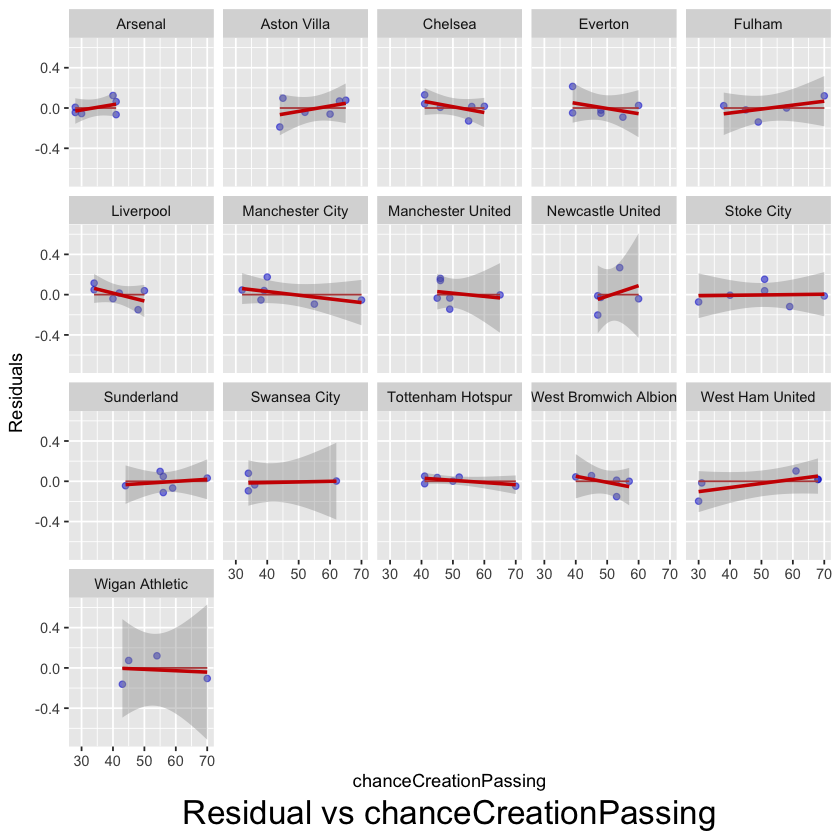

In [44]:
ggplot(epl, aes(chanceCreationPassing, y=res)) +
  geom_point(alpha = .5,colour="blue3") +
  geom_line(y=0, col="red3") +
  geom_smooth(method = "lm", col = "red3") +
  xlab("chanceCreationPassing") +
  ylab("Residuals") +
  labs(caption="Residual vs chanceCreationPassing") +
  theme(plot.caption = element_text(hjust = 0.5, size = 20)) +
  facet_wrap(~team,ncol = 5)

`geom_smooth()` using formula 'y ~ x'



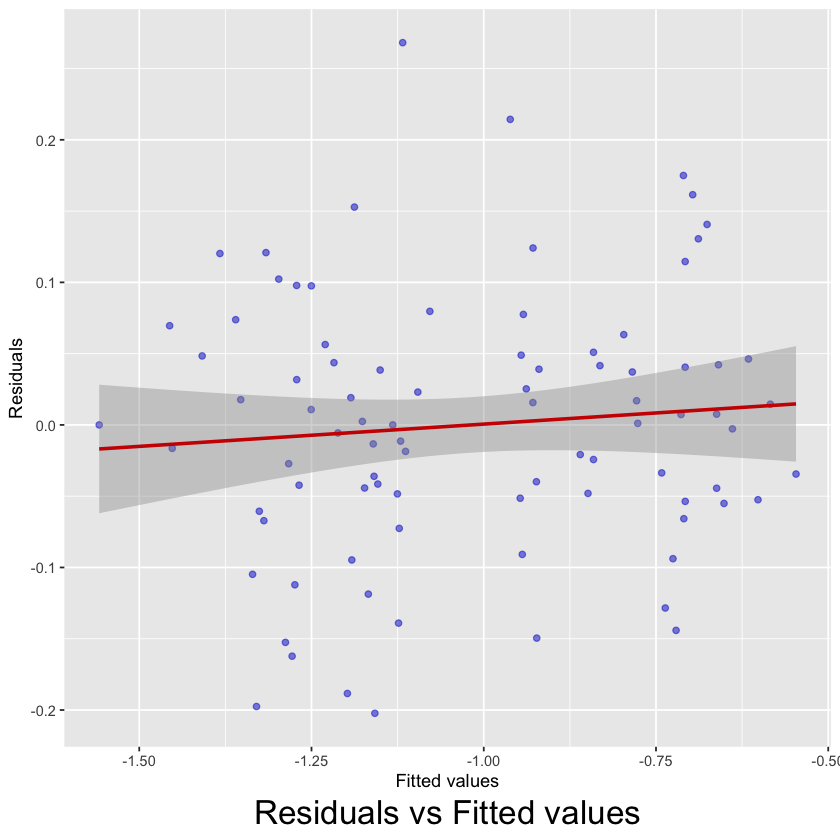

In [45]:
# Independence and Equality of Variance
pred <- predict(base_line_model)
pred_res <- data.frame(pred, res)
ggplot(pred_res, aes(pred, y=res)) +
  geom_point(alpha = .5,colour="blue3") +
  #geom_line(y = 0, col = "red3") +
  geom_smooth(method="lm",col="red3") +
  xlab("Fitted values") +
  ylab("Residuals") +
  labs(caption="Residuals vs Fitted values") +
  theme(plot.caption = element_text(hjust = 0.5, size = 20))

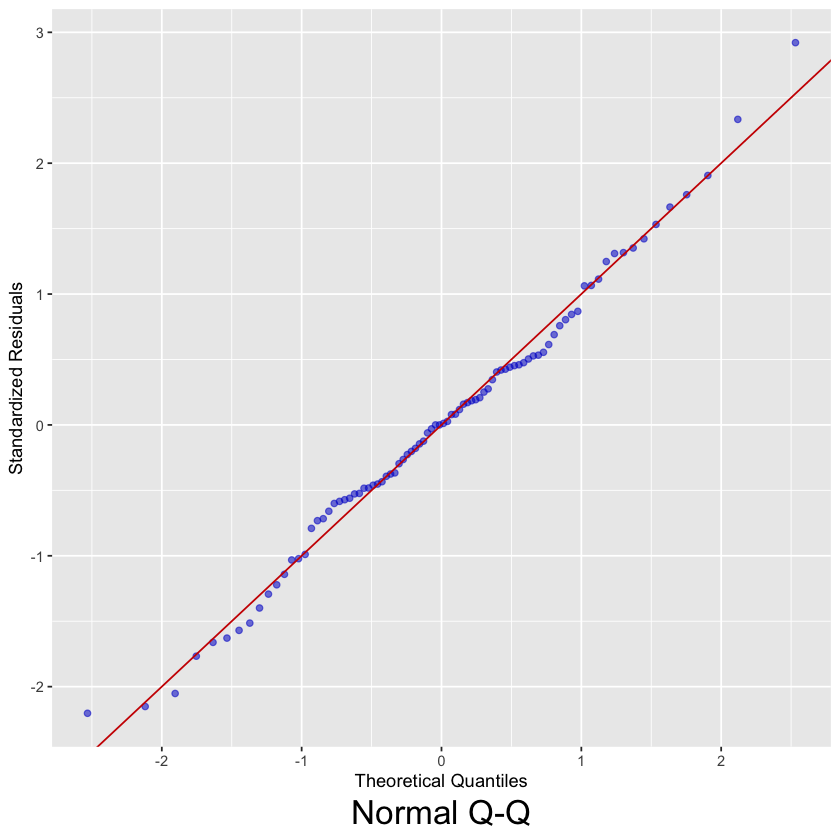

In [46]:
# Normality
std_res <- (res - mean(res)) / sd(res)
std_res_df <- data.frame(std_res)
qplot(sample = std_res, data = std_res_df, color=I("blue3"), alpha=.5) +
  geom_abline(intercept = 0, slope = 1, col="red3") +
  xlab("Theoretical Quantiles") +
  ylab("Standardized Residuals") +
  labs(caption="Normal Q-Q") +
  theme(plot.caption = element_text(hjust = 0.5, size = 20), legend.position = "none")

# Model Prediction

Load 2015-2016 season data

In [49]:
mock_data <- read.csv("../00_Data/mockup_2015-2016_dataset.csv",header=T, na.strings = c("NA","."))

In [50]:
mock_data <- subset(mock_data, select=-c(defenceDefenderLineClass))

mock_data$date <- factor(mock_data$date)
mock_data$buildUpPlaySpeedClass <- factor(mock_data$buildUpPlaySpeedClass)
mock_data$buildUpPlayDribblingClass <- factor(mock_data$buildUpPlayDribblingClass)
mock_data$buildUpPlayPassingClass <- factor(mock_data$buildUpPlayPassingClass)
mock_data$buildUpPlayPositioningClass <- factor(mock_data$buildUpPlayPositioningClass)
mock_data$chanceCreationPassingClass <- factor(mock_data$chanceCreationPassingClass)
mock_data$chanceCreationCrossingClass <- factor(mock_data$chanceCreationCrossingClass)
mock_data$chanceCreationShootingClass <- factor(mock_data$chanceCreationShootingClass)
mock_data$chanceCreationPositioningClass <- factor(mock_data$chanceCreationPositioningClass)
mock_data$defencePressureClass <- factor(mock_data$defencePressureClass)
mock_data$defenceAggressionClass <- factor(mock_data$defenceAggressionClass)
mock_data$defenceTeamWidthClass <- factor(mock_data$defenceTeamWidthClass)
mock_data$team <- factor(mock_data$team)
mock_data$season <- factor(mock_data$season)
mock_data$log_overall_win_perc <- log(mock_data$overall_win_perc)

In [51]:
y_pred <- predict(base_line_model, mock_data, allow.new.levels=TRUE)
mock_data$y_pred <- y_pred

In [52]:
tmp1 <- mock_data %>%
    select(season, y_pred) %>%
    group_by(season) %>%
    summarise(max = max(y_pred))

tmp2 <- inner_join(mock_data, tmp1, by=c("season" = "season", "y_pred" = "max"))
tmp3 <- subset(tmp2, select=c(season, team, log_overall_win_perc, y_pred))
arrange(tmp3, season, y_pred)

season,team,log_overall_win_perc,y_pred
<fct>,<fct>,<dbl>,<dbl>
2015/2016,Arsenal,-0.7612006,-0.6727761


In [53]:
mock_test <- subset(mock_data, select=c(season, team, log_overall_win_perc, y_pred))
arrange(mock_test, season, y_pred)

season,team,log_overall_win_perc,y_pred
<fct>,<fct>,<dbl>,<dbl>
2015/2016,Aston Villa,-2.1906672,-1.5710250
2015/2016,West Ham United,-0.8967461,-1.4282563
2015/2016,Swansea City,-1.1737329,-1.4238570
2015/2016,West Bromwich Albion,-1.2626804,-1.3988929
2015/2016,Sunderland,-1.3603189,-1.2812976
2015/2016,Bournemouth,-1.2862109,-1.2685891
2015/2016,Crystal Palace,-1.2862109,-1.2482343
2015/2016,Norwich City,-1.4975200,-1.2166786
2015/2016,Newcastle United,-1.4129626,-1.1685626


### Actual Winner 

2015/2016 - Leicester - 1st place <br>
2015/2016 - Arsenal - 2nd place <br>

In [54]:
#print(base_line_model, correlation=TRUE)

In [55]:
#vcov(base_line_model) 

$team


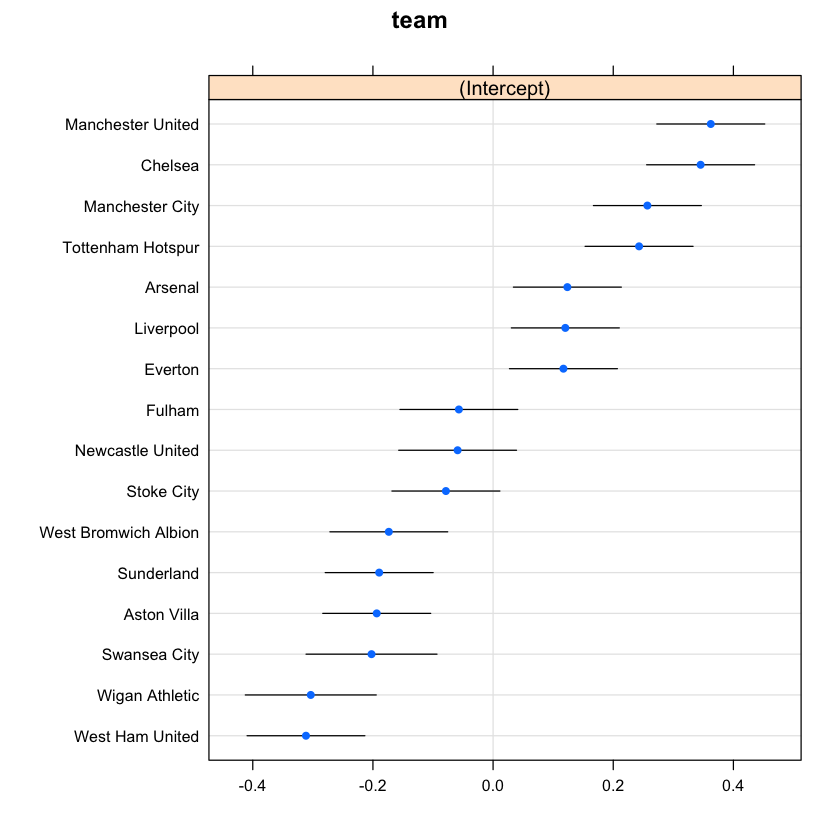

In [56]:
dotplot(ranef(base_line_model, condVar=TRUE))

In [57]:
tab_model(base_line_model)